In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#import the countries data from the csv file with an index column of countries
df_morn = pd.read_csv("./week_testing/Ali.csv")
df_morn.info()

#create columns for counts
counts_1_3 = df_morn['Chan_0_1']
counts_2_3 = df_morn['Chan_0_2']
counts_1_2 = df_morn['Chan_1_2']

timestamps = df_morn['timestamp'].values
print(type(timestamps))
print(df_morn)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1461 non-null   int64 
 1   Chan_0_2   1461 non-null   int64 
 2   Chan_1_2   1461 non-null   int64 
 3   timestamp  1461 non-null   object
dtypes: int64(3), object(1)
memory usage: 45.8+ KB
<class 'numpy.ndarray'>
      Chan_0_1  Chan_0_2  Chan_1_2                  timestamp
0            2         2         4   Mon Mar 27 15:25:24 2023
1            4         3         5   Mon Mar 27 15:26:24 2023
2            2         1         4   Mon Mar 27 15:27:24 2023
3            3         2         4   Mon Mar 27 15:28:24 2023
4            3         1         4   Mon Mar 27 15:29:24 2023
...        ...       ...       ...                        ...
1456       111        16        17   Tue Mar 28 15:41:24 2023
1457       170         5        12   Tue Mar 28 15:42:24 2023
1458       111        15   

In [3]:
df_morn.dropna(inplace=True)

In [4]:
df_morn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Chan_0_1   1461 non-null   int64 
 1   Chan_0_2   1461 non-null   int64 
 2   Chan_1_2   1461 non-null   int64 
 3   timestamp  1461 non-null   object
dtypes: int64(3), object(1)
memory usage: 45.8+ KB


In [5]:
df_morn['timestamp'] = pd.to_datetime(df_morn['timestamp'])
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,2,2,4,2023-03-27 15:25:24
1,4,3,5,2023-03-27 15:26:24
2,2,1,4,2023-03-27 15:27:24
3,3,2,4,2023-03-27 15:28:24
4,3,1,4,2023-03-27 15:29:24


In [6]:
df_morn.sort_values(by='timestamp', ascending=True, inplace=True)
df_morn.head()

,Chan_0_1,Chan_0_2,Chan_1_2,timestamp
0,2,2,4,2023-03-27 15:25:24
1,4,3,5,2023-03-27 15:26:24
2,2,1,4,2023-03-27 15:27:24
3,3,2,4,2023-03-27 15:28:24
4,3,1,4,2023-03-27 15:29:24


In [7]:
df_morn_counts = df_morn[['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2']]
df_morn_counts.columns

Index(['timestamp', 'Chan_0_1', 'Chan_0_2', 'Chan_1_2'], dtype='object')

In [8]:
df_morn_counts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1461 non-null   datetime64[ns]
 1   Chan_0_1   1461 non-null   int64         
 2   Chan_0_2   1461 non-null   int64         
 3   Chan_1_2   1461 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 57.1 KB


In [9]:
df_morn_counts = df_morn_counts.resample('H', on = 'timestamp', axis=0).mean()
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2
timestamp,,,
2023-03-27 15:00:00,74.285714,2.485714,8.400000
2023-03-27 16:00:00,110.666667,3.966667,11.216667
2023-03-27 17:00:00,121.916667,3.916667,11.883333
2023-03-27 18:00:00,116.050000,3.933333,11.300000
2023-03-27 19:00:00,111.500000,4.366667,11.433333


In [10]:
#df_morn_counts= df_morn.interpolate(method='linear', limit_direction='both')  
#df_morn_counts.drop_duplicates(inplace=True)

#df_morn_counts.head(20)

Text(0.5, 1.0, 'March 18 Morning Individualized Counts')

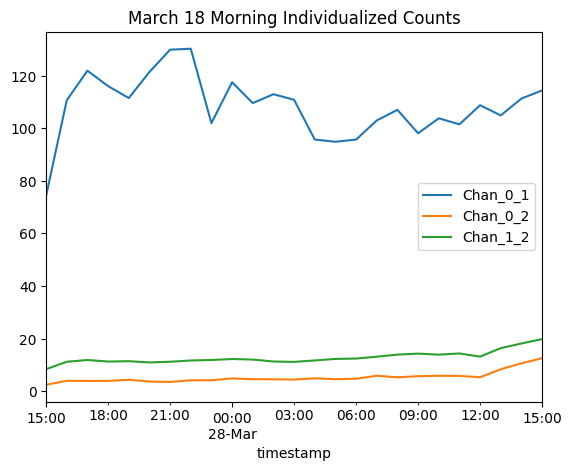

In [11]:
df_morn_counts.plot()
plt.title('March 18 Morning Individualized Counts')

In [12]:
df_morn_counts['average'] = df_morn_counts[['Chan_0_1', 'Chan_0_2', 'Chan_1_2']].mean(axis=1)
df_morn_counts.head()

,Chan_0_1,Chan_0_2,Chan_1_2,average
timestamp,,,,
2023-03-27 15:00:00,74.285714,2.485714,8.400000,28.390476
2023-03-27 16:00:00,110.666667,3.966667,11.216667,41.950000
2023-03-27 17:00:00,121.916667,3.916667,11.883333,45.905556
2023-03-27 18:00:00,116.050000,3.933333,11.300000,43.761111
2023-03-27 19:00:00,111.500000,4.366667,11.433333,42.433333


Text(0.5, 1.0, 'Ali Home March 27 to March 28')

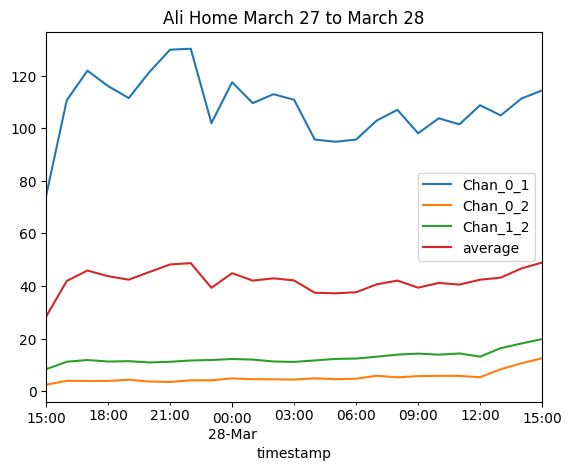

In [13]:
df_morn_counts.plot()
plt.title('Ali Home March 27 to March 28')
#plt.ylim(0,150)

Text(0.5, 1.0, 'March 18 Morning Average Counts')

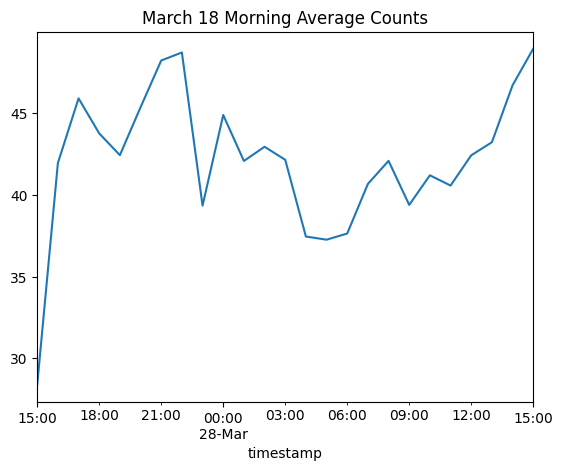

In [14]:
df_morn_counts['average'].plot()
plt.title('March 18 Morning Average Counts')